# 1. サンプルコード格納場所

### github URL

In [ ]:
https://github.com/tozawahiroya/Tech0_Step4_FastAPI_Flask

# 

# 2. 起動方法（CLI）

##   2-1.Flask

In [ ]:
pip install Flask 　　　　　　#install済みであれば省略

In [ ]:
# Windows: Powercell
$env:FLASK_APP =  "app.py"       #"app.py"の部分はFlaskのpythonファイル名に変更
flask run --port 5001                     #今回は5001 portを使用

In [ ]:
# Mac : ターミナル
export FLASK_APP = app.py    #app.py の部分はFlaskのpythonファイル名に変更
flask run --port 5001                #今回は5001 portを使用

##   2-2.FastAPI

In [ ]:
pip install fastapi uvicorn　　　　　

In [ ]:
# Windows, Macほぼ共通
uvicorn main:app --reload --port 8001      #"main.py"の場合のPrompt。"main"部分に作成したpythonファイル名(.pyは除く)を代替

# 

# 3. API Requestの準備

In [ ]:
import requests  # import

In [ ]:
##End pointの設定　  -    port + "/double"
Flask_url = 'http://127.0.0.1:5001/double'     # Flask / port 5001
FastAPI_url = 'http://127.0.0.1:8001/double'  # FastAPI /  port 8001

# 

# 4. API document / リクエストボディの作成

## FastAPIのDocs確認

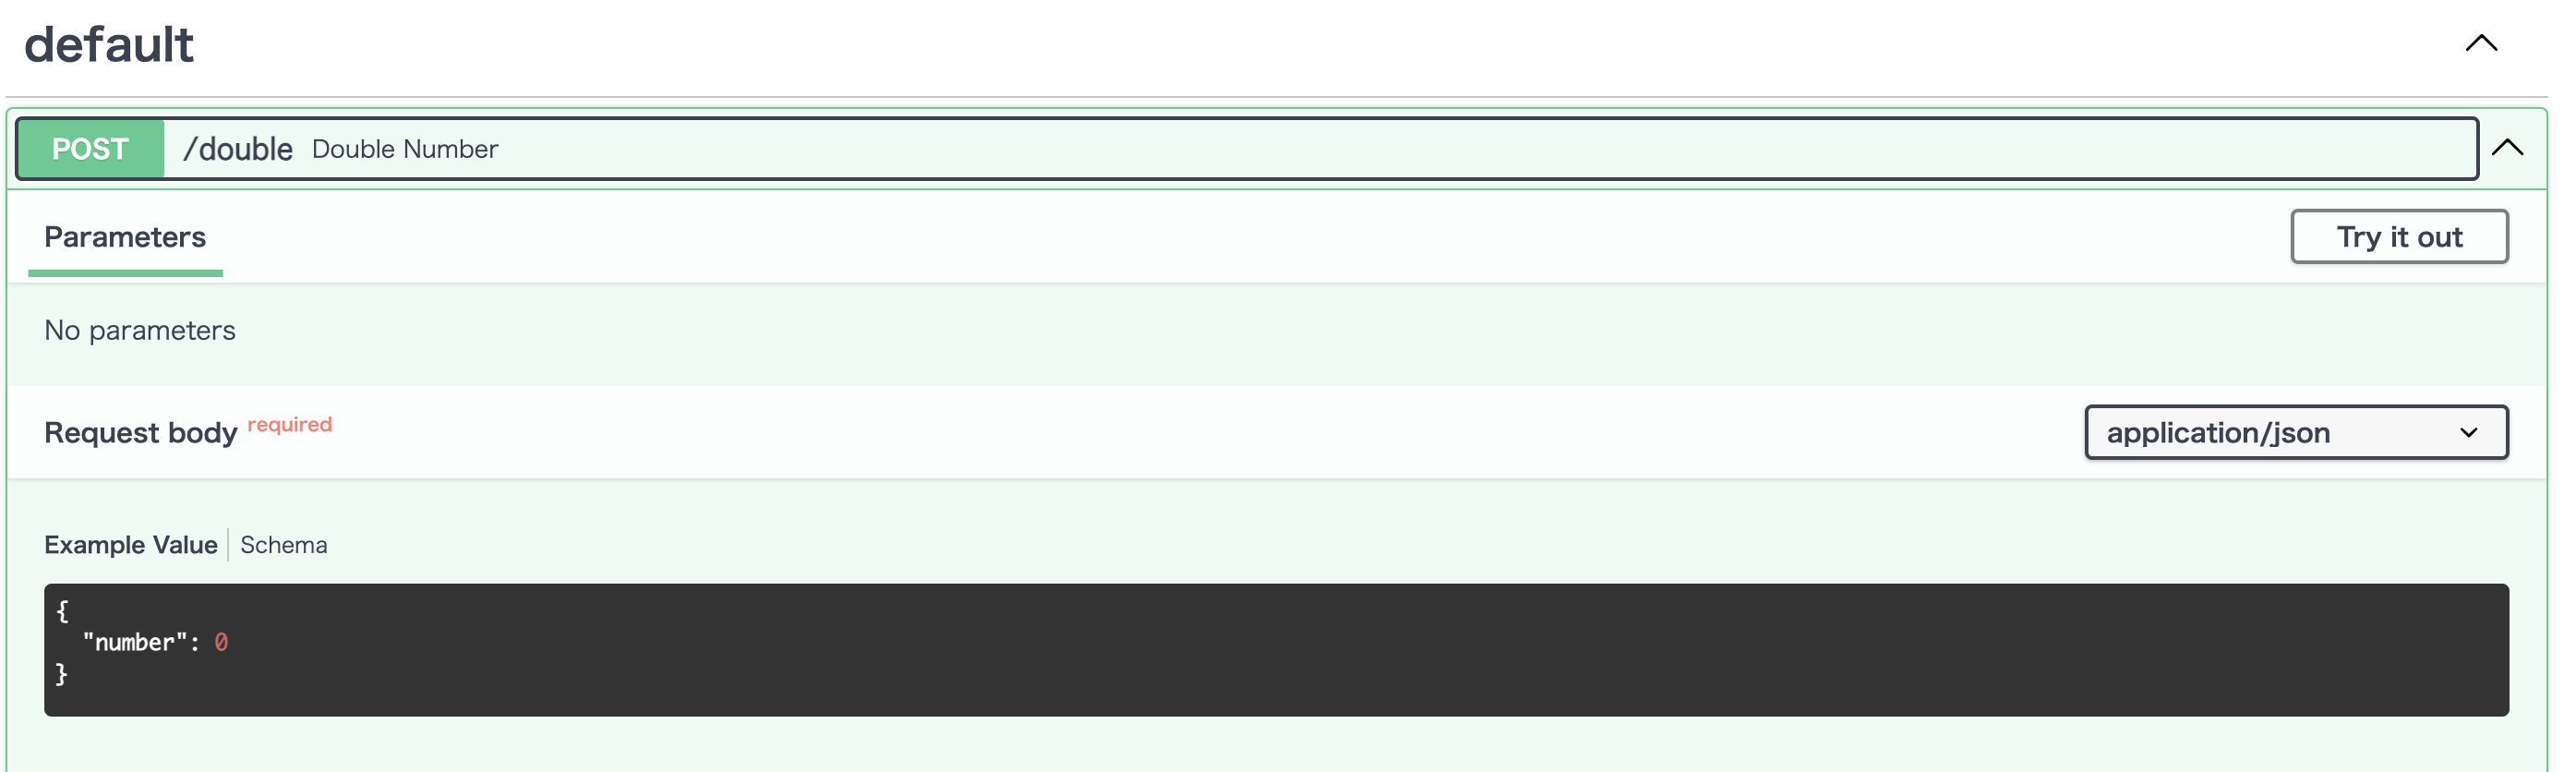

In [ ]:
# FastAPI / API docs通りにリクエストボディ（body）を作成。
body = {
    "number" : 10
}

# 

# POST & Responseの確認（正常パターン）

##   2-1.Flask

In [ ]:
res_flask = requests.post(Flask_url,json = body)  #Endpointは"Flask_url"を指定

In [ ]:
res_flask

In [ ]:
res_flask.json()

##   2-2.FastAPI

In [ ]:
res_fastapi = requests.post(FastAPI_url,json = body)  #Endpointは"FastAPI_url"を指定

In [ ]:
res_fastapi 

In [ ]:
res_fastapi .json()

### どちらも 10 x 2 = 20の結果を正しく回答

# 

# 

# Errorパターン：文字列のPOST

In [ ]:
# bodyを文字列としてみる
body = {
    "number" : "a"
}

##   2-1.Flask

In [ ]:
res_flask = requests.post(Flask_url,json = body)  #Endpointは"Flask_url"を指定

In [ ]:
res_flask

In [ ]:
res_flask.json()

### "aa"というレスポンス。PythonやJavascriptでの「文字 x 2」の計算結果は、文字の2回繰り返しとなる。
 ただし、純粋な数学/数式として成り立っていないのは明らか。。

# 

##   2-2.FastAPI

In [ ]:
res_fastapi = requests.post(FastAPI_url,json = body)  #Endpointは"FastAPI_url"を指定

In [ ]:
res_fastapi 

In [ ]:
res_fastapi .json()

### 「文字列：String」が入力となった時点でError。　型定義に合っていない入力は受け入れない仕様

# 

# 

# おまけ　Pydanticの罠

##   2-1.Flask

In [ ]:
# bodyを文字列としてみる
body = {
    "number" : 10.9     # float型
}

In [ ]:
res_flask = requests.post(Flask_url,json = body)  #Endpointは"Flask_url"を指定

In [ ]:
res_flask

In [ ]:
res_flask.json()

##   2-2.FastAPI

In [ ]:
res_fastapi = requests.post(FastAPI_url,json = body)  #Endpointは"FastAPI_url"を指定

In [ ]:
res_fastapi 

In [ ]:
res_fastapi .json()

### どちらも 10 x 2 = 20の結果を正しく回答